<a href="https://colab.research.google.com/github/revanth2605/ML/blob/main/AP23110010566_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Introduction

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [ ]:
def generate_examples(num=1000):
    W =[1.0, -3.0]
    b = 1.0

    W = np.reshape(W,(2,1))
    x = np.random.randn(num, 2)
    y = b + np.dot(x, W) + np.random.randn(num, 1)
    y = np.reshape(y, (num,1))
    return x, y

In [ ]:
x, y = generate_examples()

In [ ]:
print(x.shape, y.shape)

(1000, 2) (1000, 1)


In [ ]:
print(x[0], y[0])

[-1.15359903 -0.31432775] [1.47274883]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to
$
\begin{equation}
min(J)
\end{equation}
$

In [ ]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features,1)
        self.b = np.random.randn()

In [ ]:
model = Model(2)
print(model.W)
print(model.b)

[[-0.43610087]
 [ 1.26978212]]
1.5464730447428645


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [ ]:
class Model(Model):
    def forward_pass(self, x):
        y_hat = self.b + np.dot(x, self.W)
        return y_hat

In [ ]:
y_hat = Model(2).forward_pass(x)
print(y_hat.shape, y_hat[0])

(1000, 1) [1.47352752]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [ ]:
def compute_loss(self, y_hat, y_true):
    m = y_hat.shape[0]
    return np.sum((y_hat - y_true)**2) / (2*m)


In [ ]:
model = Model(2)
y_hat= model.forward_pass(x)
loss = model.compute_loss(y_hat, y)

In [ ]:
loss

np.float64(12.299415926473152)

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [ ]:
class Model(Model):
    def backward_pass(self, x, y_true, y_hat):
        m = y_true.shape[0]
        db = 1/m*np.sum(y_hat-y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat-y_true), x), axis=0)
        return dW, db

In [ ]:
model = Model(2)
x, y = generate_examples()
y_hat = model.forward_pass(x)
dW, db = model.backward_pass(x, y, y_hat)

In [ ]:
print(dW, db)

[-0.55704652  3.30451874] -1.2035883962442344


# Task 7: Update Parameters

In [ ]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W= self.W-lr*np.reshape(dW, (self.num_features,1))
        self.b = self.b-db

# Task 8: Training Loop

In [ ]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print('Iter: {}, Loss: {:.4f}'.format(i, loss))
        return losses


In [ ]:
import numpy as np

# ---------------------------
# Data Generator
# ---------------------------
def generate_examples(num=1000):
    W = np.array([[1.0], [-3.0]])   # true weights
    b = 1.0                         # true bias
    x = np.random.randn(num, 2)     # (num,2) features
    noise = np.random.randn(num, 1) # per-sample noise
    y = b + x @ W + noise           # linear relation + noise
    return x, y


# ---------------------------
# Linear Regression Model
# ---------------------------
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, x):
        return self.b + x @ self.W

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true) ** 2) / (2 * m)

    def backward_pass(self, x, y_true, y_hat):
        m   = y_true.shape[0]
        err = y_hat - y_true          # (m,1)
        dW  = (x.T @ err) / m         # (n,1)
        db  = np.sum(err) / m         # scalar
        return dW, db

    def update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

    def train(self, x_train, y_train, iterations=1000, lr=1e-3, log=True):
        losses = []
        log_every = max(iterations // 10, 1)

        for i in range(1, iterations + 1):   # start from 1
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)

            losses.append(loss)

            if log and (i % log_every == 0 or i == 1):
                print(f"Iter: {i}, Loss: {float(loss):.6f}")

        return losses


# ---------------------------
# Training Example
# ---------------------------
x_train, y_train = generate_examples(1000)
model = Model(num_features=2)

losses = model.train(x_train, y_train, iterations=500, lr=3e-3)

print("\nFinal Weights:\n", model.W)
print("Final Bias:\n", model.b)

Iter: 1, Loss: 9.773652
Iter: 50, Loss: 7.455405
Iter: 100, Loss: 5.688574
Iter: 150, Loss: 4.372886
Iter: 200, Loss: 3.393056
Iter: 250, Loss: 2.663285
Iter: 300, Loss: 2.119709
Iter: 350, Loss: 1.714787
Iter: 400, Loss: 1.413126
Iter: 450, Loss: 1.188375
Iter: 500, Loss: 1.020912

Final Weights:
 [[ 0.52754029]
 [-2.06912516]]
Final Bias:
 0.8955217816930611


In [ ]:
model = Model(2)

In [ ]:
x_train, y_train = generate_examples()

In [ ]:
losses = model.train(x_train, y_train, 1000, 3e-2)

Iter: 1, Loss: 4.941742
Iter: 100, Loss: 0.497902
Iter: 200, Loss: 0.484037
Iter: 300, Loss: 0.483995
Iter: 400, Loss: 0.483995
Iter: 500, Loss: 0.483995
Iter: 600, Loss: 0.483995
Iter: 700, Loss: 0.483995
Iter: 800, Loss: 0.483995
Iter: 900, Loss: 0.483995
Iter: 1000, Loss: 0.483995


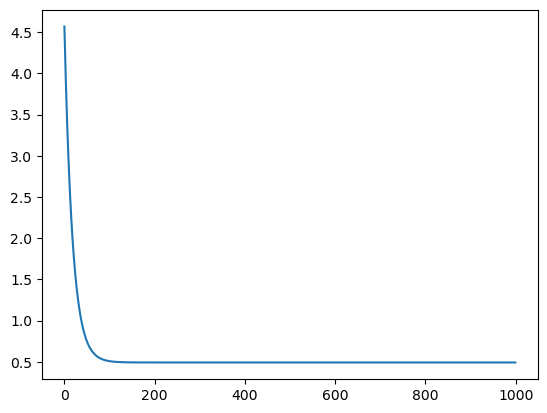

In [ ]:
plt.plot(losses)

# Task 9: Predictions

In [ ]:
import numpy as np

# ---------------------------
# Data Generator
# ---------------------------
def generate_examples(num=1000):
    W = np.array([[1.0], [-3.0]])   # true weights
    b = 1.0                         # true bias
    x = np.random.randn(num, 2)     # (num,2) features
    noise = np.random.randn(num, 1) # per-sample noise
    y = b + x @ W + noise           # linear relation + noise
    return x, y


# ---------------------------
# Linear Regression Model
# ---------------------------
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, x):
        return self.b + x @ self.W

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true) ** 2) / (2 * m)

    def backward_pass(self, x, y_true, y_hat):
        m   = y_true.shape[0]
        err = y_hat - y_true          # (m,1)
        dW  = (x.T @ err) / m         # (n,1)
        db  = np.sum(err) / m         # scalar
        return dW, db

    def update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

    def train(self, x_train, y_train, iterations=1000, lr=1e-3, log=True):
        losses = []
        log_every = max(iterations // 10, 1)

        for i in range(1, iterations + 1):   # start from 1
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)

            losses.append(loss)

            if log and (i % log_every == 0 or i == 1):
                print(f"Iter: {i}, Loss: {float(loss):.6f}")

        return losses


# ---------------------------
# Training Example
# ---------------------------
x_train, y_train = generate_examples(1000)
model = Model(num_features=2)

losses = model.train(x_train, y_train, iterations=500, lr=3e-3)

print("\nFinal Weights:\n", model.W)
print("Final Bias:\n", model.b)


Iter: 1, Loss: 3.016705
Iter: 50, Loss: 2.385359
Iter: 100, Loss: 1.904442
Iter: 150, Loss: 1.546512
Iter: 200, Loss: 1.280092
Iter: 250, Loss: 1.081766
Iter: 300, Loss: 0.934117
Iter: 350, Loss: 0.824186
Iter: 400, Loss: 0.742329
Iter: 450, Loss: 0.681373
Iter: 500, Loss: 0.635976

Final Weights:
 [[ 0.9041914 ]
 [-2.58309509]]
Final Bias:
 0.7763235583082545


**Linear regression on breast cancer dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'revanth261205'
os.environ['KAGGLE_KEY'] = '24a59c2b135f9218c788af95ed4a2ee1'

In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 174MB/s]


In [ ]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['diagnosis'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.dropna(axis=1, inplace=True)

In [ ]:
print("Shape of the dataframe after dropping null values:", df.shape)

Shape of the dataframe after dropping null values: (569, 32)


In [ ]:
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.drop('radius_mean', axis=1)
y = df['radius_mean']
display(X.head())
display(y.head())

,id,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,radius_mean
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 31)
Shape of X_test: (114, 31)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared score:", r2)

Mean Squared Error (MSE): 0.004766805971323216
R-squared score: 0.999605600658836
